<a href="https://colab.research.google.com/github/Foofdof/ML/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/liyenhsu/Neural-Network-with-Keras-for-Kaggle-Titanic-Dataset/master/data/test.csv')
train = pd.read_csv('https://raw.githubusercontent.com/liyenhsu/Neural-Network-with-Keras-for-Kaggle-Titanic-Dataset/master/data/train.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#train = train.dropna()
#test = test.dropna()
#train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


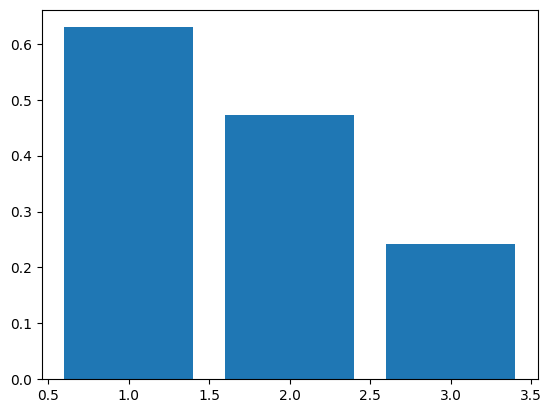

In [ ]:
df = train[['Pclass','Survived']].groupby('Pclass', as_index=False).mean()

fig, ax = plt.subplots()
hist = ax.bar(df['Pclass'], df['Survived'])

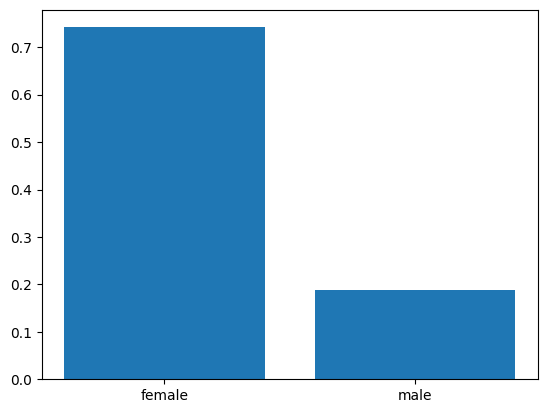

In [ ]:
#train.groupby('Sex')['Survived'].sum()
df = train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

fig, ax = plt.subplots()
hist = ax.bar(df['Sex'], df['Survived'])

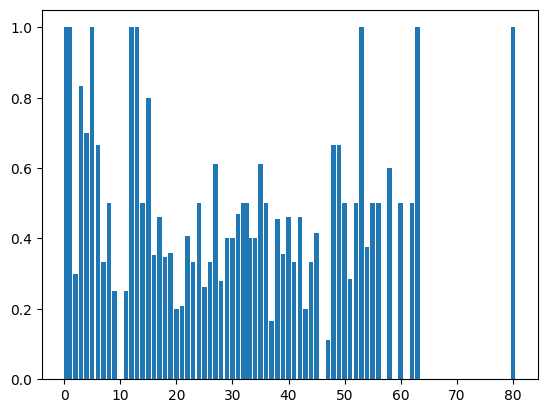

In [ ]:
df = train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean()

fig, ax = plt.subplots()
hist = ax.bar(df['Age'], df['Survived'])

In [ ]:
df = pd.concat([train, test], ignore_index=True)
df = df.drop(columns=['SibSp','Parch','Fare','Name','Ticket','Cabin','Embarked'], axis=1).dropna()
df.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0.0,3,male,22.0
1,2,1.0,1,female,38.0
2,3,1.0,3,female,26.0
3,4,1.0,1,female,35.0
4,5,0.0,3,male,35.0


In [ ]:
features = np.array(pd.concat([df['Pclass'], df['Age'], pd.get_dummies(df['Sex'])], axis=1), dtype=np.int32)
y = np.array(df['Survived'].values, dtype=np.int32)

print(features)
print(y)

print(features.shape)
print(y.shape)

[[ 3 22  0  1]
 [ 1 38  1  0]
 [ 3 26  1  0]
 ...
 [ 1 19  1  0]
 [ 1 26  0  1]
 [ 3 32  0  1]]
[0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0
 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1
 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1
 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1
 1 0

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

Epoch 1/200
32/32 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5972
Epoch 2/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6868 - accuracy: 0.5972
Epoch 3/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6806 - accuracy: 0.5972
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5972
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.5972
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.5972
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.5972
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.5972
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.5972
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.5972
Epoch 11/

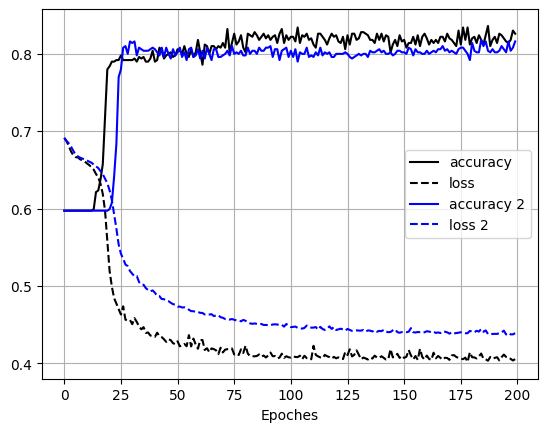

In [ ]:
model1 = Sequential([
    keras.layers.Dense(4, kernel_initializer = 'uniform', activation='relu'),
    keras.layers.Dense(9, kernel_initializer = 'uniform', activation='relu'),
    keras.layers.Dense(5, kernel_initializer = 'uniform', activation='relu'),
    keras.layers.Dense(2, kernel_initializer = 'uniform', activation='softmax'),
])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, batch_size=16, epochs=200)

model2 = Sequential([
    keras.layers.Dense(4, kernel_initializer = 'uniform', activation='relu'),
    keras.layers.Dense(8, kernel_initializer = 'uniform', activation='relu'),
    keras.layers.Dense(5, kernel_initializer = 'uniform', activation='relu'),
    keras.layers.Dense(3, kernel_initializer = 'uniform', activation='relu'),
    keras.layers.Dense(2, kernel_initializer = 'uniform', activation='softmax'),
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, batch_size=16, epochs=200)

plt.plot(history1.history['accuracy'], label='accuracy', c='black')
plt.plot(history1.history['loss'], label='loss', c='black', linestyle='dashed')

plt.plot(history2.history['accuracy'], label='accuracy 2', c='blue')
plt.plot(history2.history['loss'], label='loss 2', c='blue', linestyle='dashed')

plt.grid(0.8)

plt.xlabel('Epoches')
plt.legend()
plt.show()


In [ ]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
print(y_test.shape)
y_pred1 = np.round(y_pred1)
y_pred2 = np.round(y_pred2)

new_array = np.where(y_pred1 > 0)[1]
print(new_array.shape)
print( abs(new_array - y_test).sum()/len(new_array) )

new_array = np.where(y_pred2 > 0)[1]
print(new_array.shape)
print( abs(new_array - y_test).sum()/len(new_array) )

(215,)
(215,)
0.22790697674418606
(215,)
0.23255813953488372
